## Image Generation from parent and childern Images 
(change to students in a Lecture Room; Output is GroupPhoto, GroupLabel)

**Inputs**: Parent (Background Image), Childern (Image to merge over the Parent)

**Output**: Grouped and Augmented imgage, Annotation of Group image

**Params**: 
    * Parent : The background images/ images (In future parents, e.g. different exposures i.e. differnt set of children)
    * Childern : The different children with which can be stacked in the Parent image

**Operataions**:
    * Cropping: Crop
    * Augementation : Augment the child images (rotate, zoom, horizontal flip, etc.)
    * Grouping : Group (4) the childern randomly and stack them in the parent image.
    * Annotating: Annotate the position of the children on the parent image.

#### WARNING!!: Use PNG in future to get better child images


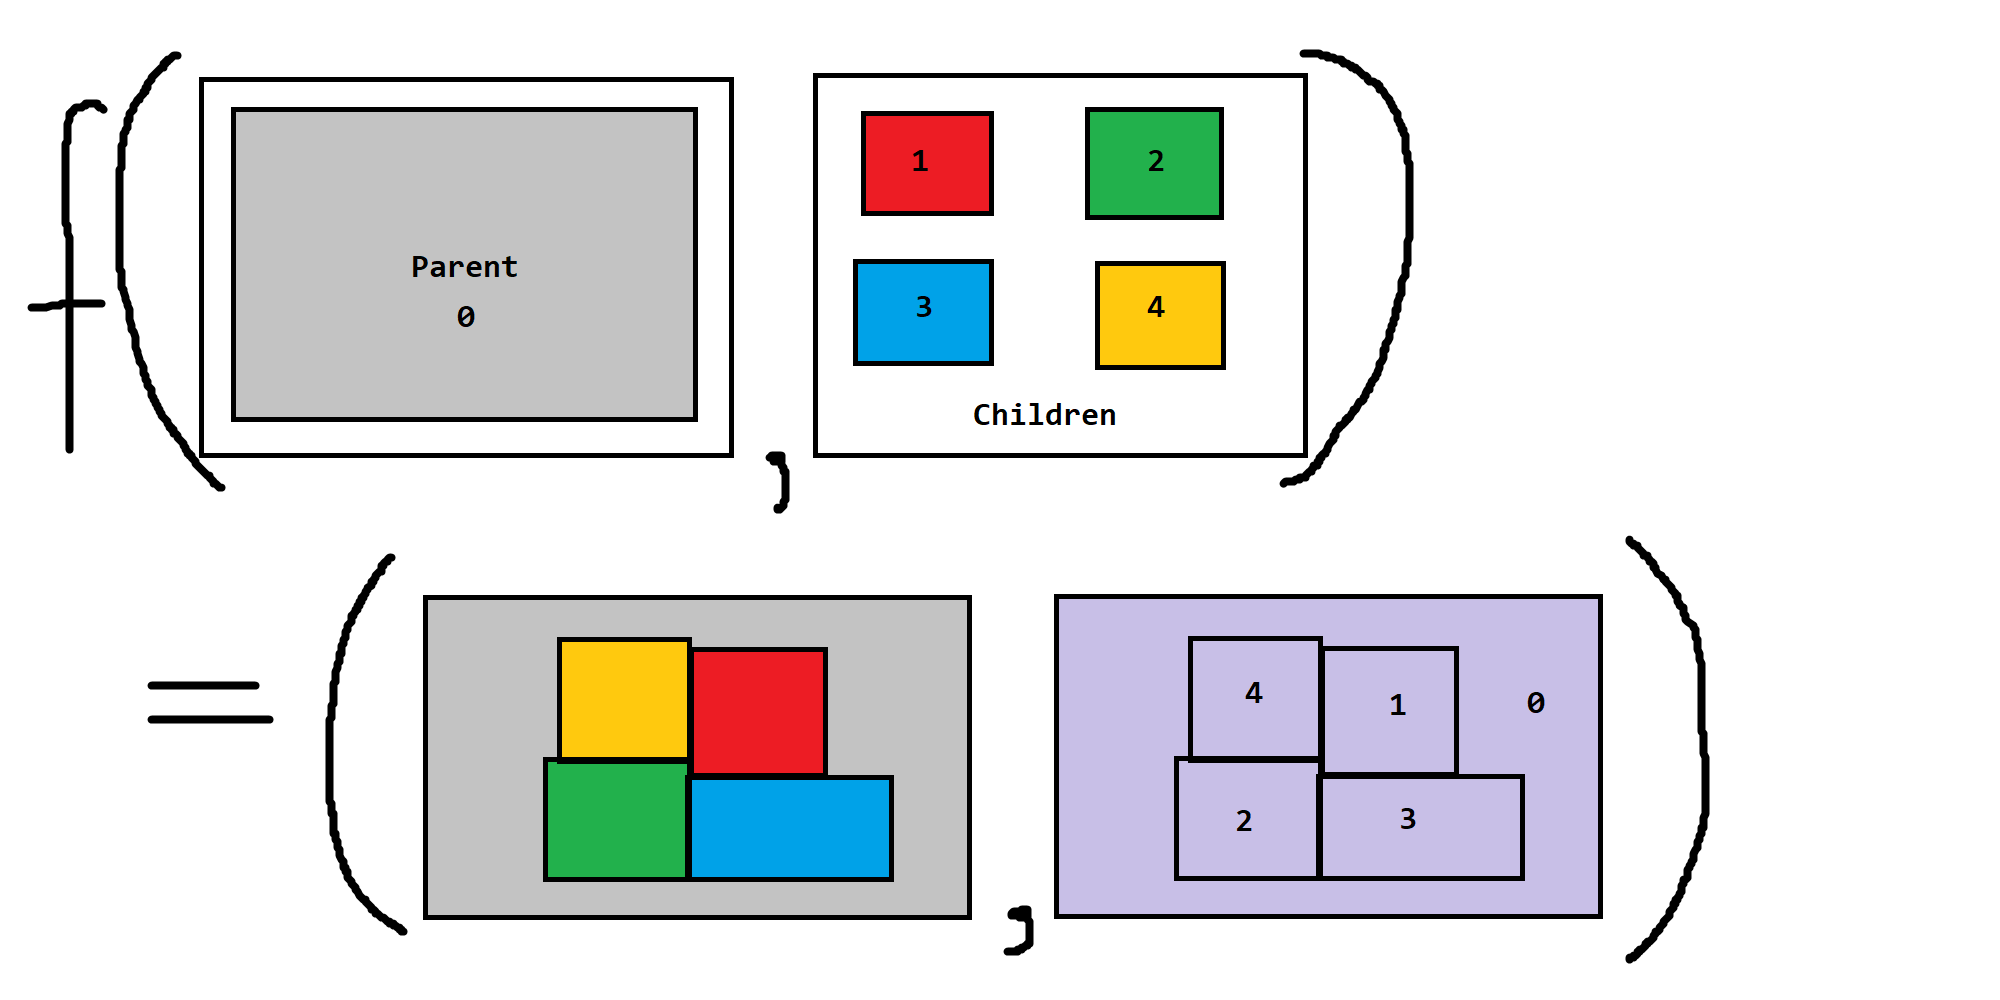

In [1]:
import numpy as np
import cv2
import imgaug
import glob
import random
import matplotlib.pyplot as plt
import pathlib

In [2]:
from imgaug import augmenters as iaa
from PIL import Image

In [3]:
student = np.array(Image.open('sample.bmp'))

In [4]:
student.shape

(964, 1292, 3)

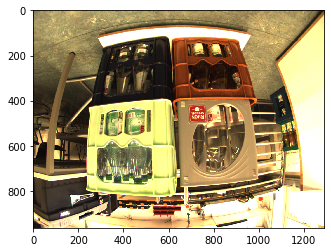

In [5]:
plt.imshow(student)

### Loading Images

In [6]:
CWD = pathlib.Path.cwd()
STUD_PATH = CWD / 'data/students'
ROOM_PATH = CWD / 'data/rooms'

In [7]:
STUDS = list(STUD_PATH.glob('**/*.png'))
ROOMS = list(ROOM_PATH.glob('**/*.png'))
print('No. of Students:' + str(len(STUDS)))
print('No. of Rooms:'+ str(len(ROOMS)))

No. of Students:8
No. of Rooms:1


In [8]:
STUD_SIZE = (70,70)
ROOM_SIZE = (200,200)

In [9]:
STUD_ARR = np.zeros([len(STUDS),STUD_SIZE[0],STUD_SIZE[1],4])
ROOM_ARR = np.zeros([len(ROOMS),ROOM_SIZE[0],ROOM_SIZE[1],4])

In [10]:
# Creating array of student images
for i, img_path in enumerate(STUDS):
    img = Image.open(img_path)
    img = img.resize(STUD_SIZE)
    img = np.array(img, dtype=np.float32)
    STUD_ARR[i,:,:,:] = img

In [11]:
# Creating array of room images
for i, img_path in enumerate(ROOMS):
    img = Image.open(img_path)
    img = img.resize(ROOM_SIZE)
    img = np.array(img, dtype=np.float32)
    img[:,:,3].fill(255)
    ROOM_ARR[i,:,:,:] = img

In [12]:
print('STUD', STUD_ARR.shape)
print('ROOM', ROOM_ARR.shape)

STUD (8, 70, 70, 4)
ROOM (1, 200, 200, 4)


### Overlaying Students in Room

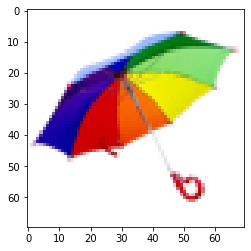

In [13]:
stud_sample = STUD_ARR[0]
room_sample = ROOM_ARR[0]
plt.imshow(stud_sample/255)

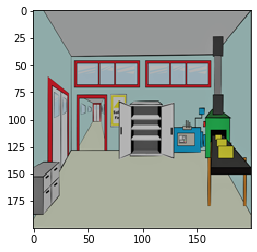

In [14]:
group_img = np.array(room_sample)
plt.imshow(group_img/255)

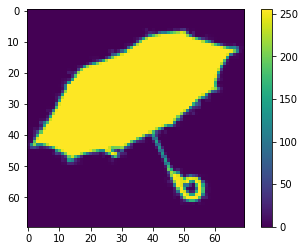

In [15]:
plt.imshow(stud_sample[:,:,3])
plt.colorbar()

Scanning Pixel-wise

In [16]:
group_img = np.array(room_sample)
stud_sample = STUD_ARR[2]
# Replace x1, x2, y1, y2 with random function

# BOX 1
h1 = 70
w1 = 65

x1 = 40
x2 = x1 + w1
y1 = 50
y2 = y1 + h1
stud_resized = cv2.resize(stud_sample ,(x2-x1,y2-y1))

In [17]:
for i in range(0,y2-y1):
    for j in range(0,x2-x1):
        if (stud_resized[i,j,3]>=100):
            group_img[y1+i, x1+j, :] = stud_resized[i,j,:]

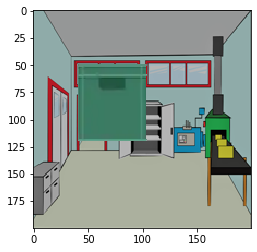

In [18]:
plt.imshow(group_img/255)

In [19]:
stud_sample = STUD_ARR[1]

# BOX 2
h_2 = 60
w_2 = 75

x1 = 30          # random variations
x2 = x1 + w_2    # x1 + rand(w2)
y1 = 50+65       # y2 of BOX 1
y2 = y1 + h_2    # y1 + rand(h2)

stud_resized = cv2.resize(stud_sample ,(x2-x1,y2-y1))
for i in range(0,y2-y1):
    for j in range(0,x2-x1):
        if (stud_resized[i,j,3]>=100):
            group_img[y1+i, x1+j, :] = stud_resized[i,j,:]

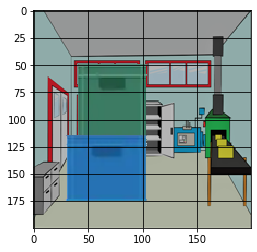

In [20]:
plt.imshow(group_img/255)
plt.grid('on',color='black')

In [21]:
stud_sample = STUD_ARR[3]

# BOX 3

h_2 = 60
w_2 = 75

x1 = 40+65       # x2 of BOX 1
x2 = x1 + w_2    # x1 + rand(w2)
y1 = 50          # y1 of BOX 1
y2 = y1 + h_2    # y1 + rand(h2)

stud_resized = cv2.resize(stud_sample ,(x2-x1,y2-y1))
for i in range(0,y2-y1):
    for j in range(0,x2-x1):
        if (stud_resized[i,j,3]>=100):
            group_img[y1+i, x1+j, :] = stud_resized[i,j,:]

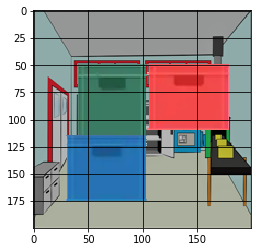

In [22]:
plt.imshow(group_img/255)
plt.grid('on',color='black')

In [23]:
stud_sample = STUD_ARR[4]

# BOX 4

h_2 = 60
w_2 = 75

x1 = 105       # x2 of BOX 2
x2 = x1 + w_2    # x1 + rand(w2)
y1 = 110         # y2 of BOX 3
y2 = y1 + h_2    # y1 + rand(h2)

stud_resized = cv2.resize(stud_sample ,(x2-x1,y2-y1))
for i in range(0,y2-y1):
    for j in range(0,x2-x1):
        if (stud_resized[i,j,3]>=100):
            group_img[y1+i, x1+j, :] = stud_resized[i,j,:]

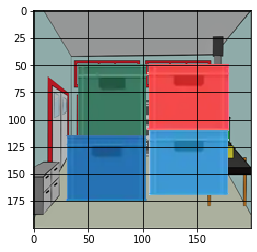

In [24]:
plt.imshow(group_img/255)
plt.grid('on',color='black')

In [25]:
def place_box(room_img, stud_img, x_lim, y_lim, width, height):
    x1 = x_lim       
    x2 = x1 + width    
    y1 = y_lim        
    y2 = y1 + height

    stud_resized = cv2.resize(stud_img ,(x2-x1,y2-y1))
    for i in range(0,y2-y1):
        for j in range(0,x2-x1):
            if (stud_resized[i,j,3]>=100):
                room_img[y1+i, x1+j, :] = stud_resized[i,j,:]
                
    # Creating annotation of that BOX
    annotation = np.zeros((room_img.shape[0], room_img.shape[1]))
    stud_annot = stud_resized[:,:,3]
    annotation[y1:y2, x1:x2] = stud_annot
    
    return group_img, annotation, x2, y2

In [26]:
def random_pos_gen(pellet_x = 40, pellet_y = 50, x_var = 5, y_var = 6, w_init=60, h_init=60, w_var=10, h_var=10):
    # rename to random_val_gen
    # Generate random positions
    x_init = pellet_x + int(np.random.randn(1)* x_var) # within the pellet limits
    y_init = pellet_y + int(np.random.randn(1)* y_var) # on the pellet
    
    #Generate random sizing
    w_rand = w_init + int(np.random.randn(1)* x_var) # within the pellet limits
    h_rand = h_init + int(np.random.randn(1)* y_var) # on the pellet  
    
    return [x_init, y_init, w_rand, h_rand]

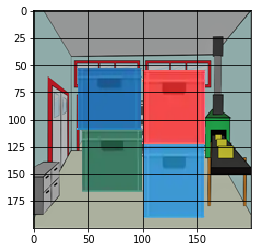

In [27]:
group_img = np.array(room_sample)

# Generating random initial positions
[x_init, y_init, w_rand, h_rand] = random_pos_gen()

# BOX_1: x_lim => random, y_lim => on the board (small variation)
group_img, annot_1, b1_x, b1_y = place_box(group_img, STUD_ARR[1], x_init, y_init, w_rand, h_rand)


# Generating random initial positions
[x_init, y_init, w_rand, h_rand] = random_pos_gen()

# BOX_2: x_lim => random, y_lim => (y_lim + height) of BOX_1
group_img, annot_2, b2_x, b2_y = place_box(group_img, STUD_ARR[2], x_init, b1_y, w_rand, h_rand)


# Generating random initial positions
[x_init, y_init, w_rand, h_rand] = random_pos_gen()

# BOX_3: x_lim => (x_lim + width) of BOX_1 , y_lim => on the board (small variation)
group_img, annot_3, b3_x, b3_y = place_box(group_img, STUD_ARR[3], b1_x, y_init, w_rand, h_rand)

# BOX_4: x_lim => min( (x_lim + width) of BOX_1 and BOX_2 )
# y_lim => (y_lim + height) of BOX_3
group_img, annot_4, b4_x, b4_y = place_box(group_img, STUD_ARR[4], min(b1_x,b2_x), b3_y, w_rand, h_rand)

plt.imshow(group_img/255)
plt.grid('on',color='black')

In [28]:
box_id = [1,2,3,4]
annots = [annot_1, annot_2, annot_3, annot_4]

for i in range(len(annots)):
    annots[i] = annots[i] * box_id[i]

In [29]:
annotations = sum(annots)
annotations[annotations>255*4] = 0 # Limiting values above 

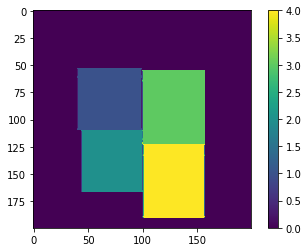

In [30]:
plt.imshow(annotations/255)
plt.colorbar()

The mask of the student is the alpha channel of that image

In [31]:
annot_sample = np.zeros((room_sample.shape[0], room_sample.shape[1]))
x1 = 40
x2 = 120
y1 = 100
y2 = 175
#annot_sample[y1:y2, x1:x2] = 1
   
stud_resized = cv2.resize(stud_sample ,(x2-x1,y2-y1))
stud_annot = stud_resized[:,:,3]
annot_sample[y1:y2, x1:x2] = stud_annot

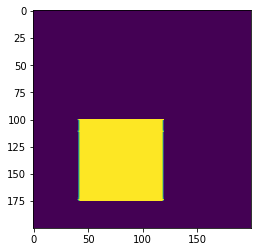

In [32]:
plt.imshow(annot_sample)

### Augmentation

In [33]:
#Preparing defect image to shape*shape png

# =============================================================================
# files = glob.glob (r'C:\Users\josep\Documents\Masters Project\Py\imgaug\*.png')
# shape=128
# i=0
# 
# for img_file in files:    
#     src= cv2.imread(img_file, cv2.IMREAD_UNCHANGED) 
#     src = cv2.resize(src, (shape,shape))
#     cv2.imwrite(r'C:\Users\josep\Documents\Masters Project\Py\imgaug\defects\defect.{0}.png'.format(i+1), src)
#     i=i+1
# =============================================================================


In [34]:
# # To import both flat_img and def_img in required formats

# flat_pil = Image.open("flat_img.png")                                           # flat_img will have shape h*w*3, need to add alpha channel
# flat_pil.putalpha(255)                                                          # 255 is full opaque
#                                                                        # To put each image into different folders, not working


In [35]:
# flat_img = np.array(flat_pil)                                                   # To convert pil to cv2 image
# #flat_img = flat_img[:, :, ::-1].copy()                                          # Convert RGB to BGR, need to check 

# # =============================================================================
# # def_img= cv2.imread('defects\defect.1.png', cv2.IMREAD_UNCHANGED)               # def_img will have shape h*w*4
# # def_img = cv2.resize(def_img, flat_img.shape[1::-1])                            # Resize to the flat_img shape
# # 
# # =============================================================================

# #imgaug, not working, images are split between channels, not required
# seq = iaa.Sequential([iaa.Affine(scale=(0.3,0.5),
#                                  translate_px=(-5,5),
#                                  rotate=(-5.0,5.0))],random_order=True)

# add_noise = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=random.randint(1,2)*0.01*255),
#                             iaa.AdditiveLaplaceNoise(scale=random.randint(1,2)*0.01*255),
#                             iaa.AdditivePoissonNoise(lam=(4,8))],random_order=True)

# # To generate defective images

# def img_gen(def_img,k):
    
#     j=0
#     for j in range(100): 
#         img_aug1 = seq.augment_images(def_img)
#         img_aug2 = cv2.addWeighted(flat_img, 1.0, img_aug1, 1.0, 0)                         # Combining defect with origianl image  
#         dst = add_noise.augment_images(img_aug2)                                            # To just add noise, pass flat_img
#         # Change defect directory each time, needs fix
#         #dst = cv2.resize(dst, (224,224))                                                    # To required input size of NN
#         cv2.imwrite(r'C:\Users\josep\Documents\Masters Project\Py\imgaug\defects\defect.1\defect.1.{0}.jpg'.format(j), dst)
        
# # Looping for each defective image present in the folder
   
# files = glob.glob (r'C:\Users\josep\Documents\Masters Project\Py\imgaug\defects\*.png')
# k=0
# for img_file in files:    
#     def_img= cv2.imread(img_file, cv2.IMREAD_UNCHANGED)                             # def_img will have shape h*w*4
#     def_img = cv2.resize(def_img, flat_img.shape[1::-1])                            # Resize to the flat_img shape
#     img_gen(def_img,k)
#     k=k+1    